# Geração de Imagens - Path Planning PI

Notebook para gerar as imagens de visualização do projeto.

In [1]:
# Auto-reload: atualiza módulos automaticamente quando o código fonte muda
%load_ext autoreload
%autoreload 2

from pathlib import Path

# Diretório raiz do projeto (notebook está na raiz)
PROJECT_ROOT = Path().resolve()

In [2]:
from src import load_scenario, plot_scenario

## Q2 - Visualização do Ambiente

Carrega um cenário e plota o ambiente com:
- Borda do ambiente (retângulo preto)
- Obstáculos (retângulos cinza)
- Ponto inicial (círculo verde)
- Ponto destino (estrela vermelha)

In [3]:
# Carrega o cenário 1
scenario_path = PROJECT_ROOT / "scenarios" / "scenario1.txt"
scenario = load_scenario(scenario_path)

print(f"Ambiente: {scenario.xmax} x {scenario.ymax}")
print(f"Start: ({scenario.start1.x}, {scenario.start1.y})")
print(f"Goal: ({scenario.goal1.x}, {scenario.goal1.y})")
print(f"Raio do robô: {scenario.R}")
print(f"Número de obstáculos: {len(scenario.obstacles)}")

Ambiente: 1000.0 x 1000.0
Start: (0.0, 0.0)
Goal: (1000.0, 1000.0)
Raio do robô: 50.0
Número de obstáculos: 4


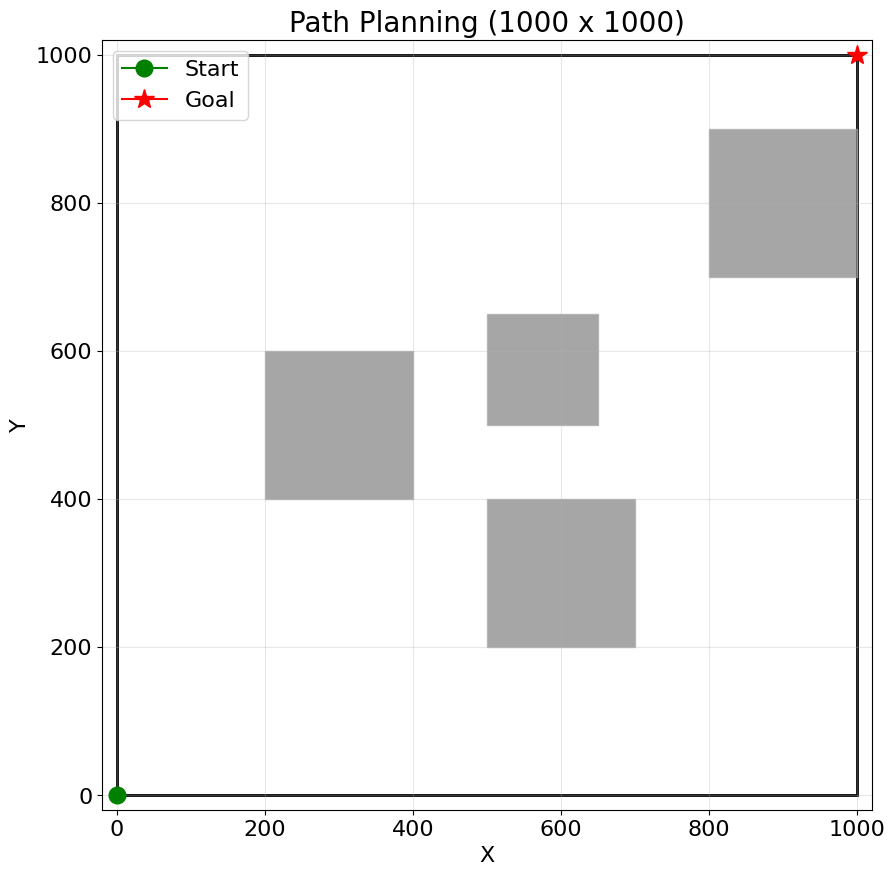

In [9]:
# Q2 - Visualização do cenário (sem caminho)
fig, ax = plot_scenario(
    scenario,
    path=None,
    save_to=PROJECT_ROOT / "images" / "q2_scenario1.png",
    show=True,
)